In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Date Alignment


In [5]:
df_trans = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\transformed_raw.csv')
df_apple = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AAPL_historical_data.csv')
df_amzn = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AMZN_historical_data.csv')


df_apple['Date'] = pd.to_datetime(df_apple['Date'], format='ISO8601')
df_trans['Date'] = pd.to_datetime(df_trans['date'], format='ISO8601').dt.normalize()
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], format='ISO8601')


df_trans['Date'] = df_trans['Date'].dt.tz_convert(None)
df_trans.drop('date', axis=1)

# print(df_trans.dtypes)
# print(df_apple.dtypes)

df_trans_apple = df_trans[df_trans['stock']=="A"]
df_apple= df_apple[(df_apple['Date'] >= df_trans['Date'].min()) & (df_apple['Date'] <= df_trans['Date'].max()) ]
df_amzn = df_amzn[(df_amzn['Date'] >= df_trans['Date'].min()) & (df_amzn['Date'] <= df_trans['Date'].max())]


print(df_trans_apple['Date'].min(), df_trans_apple['Date'].max())
print(df_apple['Date'].min(), df_apple['Date'].max())
print(df_amzn['Date'].min(), df_apple['Date'].max())



2009-04-29 04:00:00 2020-06-05 04:00:00
2009-02-17 00:00:00 2020-06-11 00:00:00
2009-02-17 00:00:00 2020-06-11 00:00:00


In [46]:
df_merged = pd.merge(df_trans_apple, df_apple, on='Date', how='outer')


In [11]:
df_merged.isna().sum()

Unnamed: 0         2850
headline           2850
url                2850
publisher          2850
date               2850
stock              2850
datetime           2850
sentiment_score    2850
sentiment          2850
tokens             2850
topic              2850
Date                  0
Open               1433
High               1433
Low                1433
Close              1433
Adj Close          1433
Volume             1433
Dividends          1433
Stock Splits       1433
dtype: int64

In [37]:



# str_cols = df_merged.select_dtypes(include=['object']).columns
# int_cols = df_merged.select_dtypes(include=['float64']).columns

df_merged['topic']= df_merged['topic'].fillna(df_merged['topic'].mean())
df_merged['High']= df_merged['High'].fillna(df_merged['High'].mean())
df_merged['Low']= df_merged['Low'].fillna(df_merged['Low'].mean())
df_merged['Close']= df_merged['Close'].fillna(df_merged['Close'].mean())
df_merged['Open']= df_merged['Open'].fillna(df_merged['Open'].mean())
df_merged['Adj Close']= df_merged['Adj Close'].fillna(df_merged['Adj Close'].mean())
df_merged['Volume']= df_merged['Volume'].fillna(df_merged['Volume'].mean())
df_merged['Dividends']= df_merged['Dividends'].fillna(df_merged['Dividends'].mean())
df_merged['Stock Splits']= df_merged['Stock Splits'].fillna(df_merged['Stock Splits'].mean())
df_merged['sentiment_score']= df_merged['sentiment_score'].fillna(df_merged['sentiment_score'].mean())




In [38]:
# df_merged.drop(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'datetime', 'sentiment', 'tokens'], axis=1, inplace=True)


In [35]:
df_merged.isna().sum()

sentiment_score    0
topic              0
Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Dividends          0
Stock Splits       0
dtype: int64

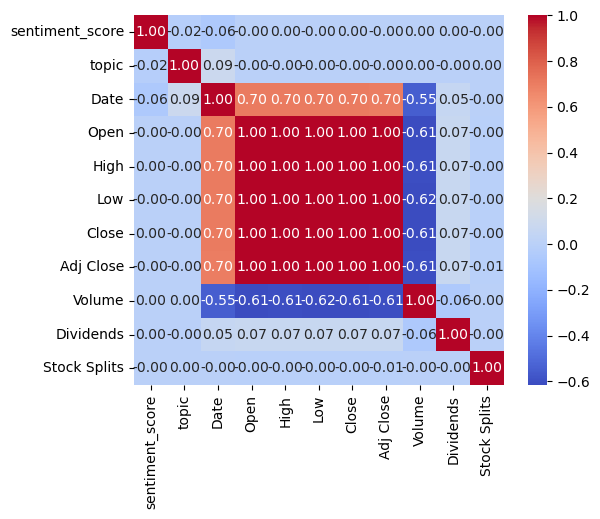

In [44]:
corr_matrix = df_merged.corr()
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()


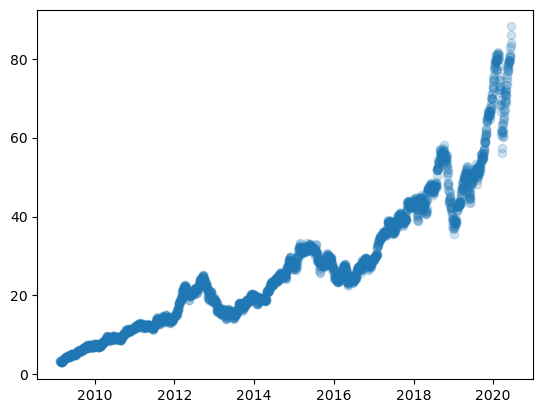

In [66]:
plt.scatter(df_merged['Date'], df_merged['Close'], alpha=0.2)
# plt.plot(df_merged['Date'], df_merged['sentiment_score'], color= 'red')
plt.show()

In [80]:
# Ensure the DataFrame is sorted by Date
df_merged = df_merged.sort_values('Date')

# Calculate daily percentage change in the 'Close' column
df_merged['Daily Return'] = df_merged['Close'].pct_change()

# Drop the first row (NaN due to no previous day)
df_grouped = df_merged.dropna(subset=['Daily Return'])
# df_grouped = df_grouped.dropna()
df_grouped = df_grouped[['Date','sentiment_score', 'Close', 'Daily Return']]

# print(df_merged[['Date', 'Close', 'Daily Return']].head())


C:\Users\Aman\AppData\Local\Temp\ipykernel_9200\20351438.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged['Daily Return'] = df_merged['Close'].pct_change()


In [85]:
df_merged[['sentiment_score']].isna().sum()

sentiment_score    2849
dtype: int64

In [81]:
df_grouped.isna().sum()

Date                  0
sentiment_score    2848
Close              1433
Daily Return          0
dtype: int64

In [82]:
correlation = df_grouped[['sentiment_score', 'Daily Return']].corr()
correlation

,sentiment_score,Daily Return
sentiment_score,1.0,NaN
Daily Return,NaN,1.0


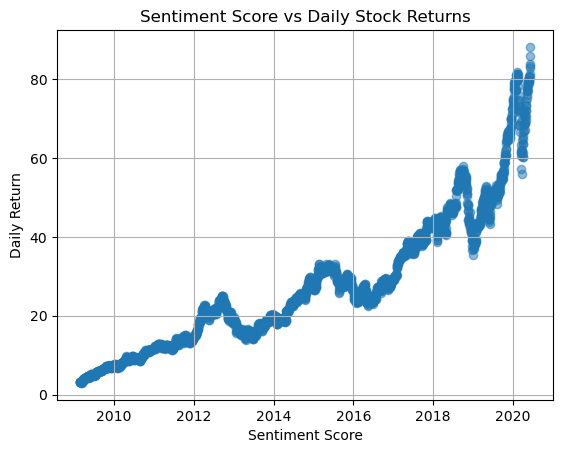

In [64]:
plt.scatter(df_grouped['Date'], df_grouped['Close'], alpha=0.5)
plt.title('Sentiment Score vs Daily Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()